Predict Orbital Period from Orbital Radius

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [10]:
G=6.67430e-11
M=1.989e30

In [11]:
def orbital_period(radius):
  T=2*np.pi*np.sqrt(radius**3/(G*M))
  return T

In [12]:
radi = np.random.uniform(1e9,4e12,5000)
periods= orbital_period(radi)

data=pd.DataFrame({'radius':radi,'period':periods})

In [13]:
X = data[["radius"]]
y= data[["period"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200)

In [15]:
y_pred = model.predict(X_test)

error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{error}")

Mean Squared Error:471795712333.5133


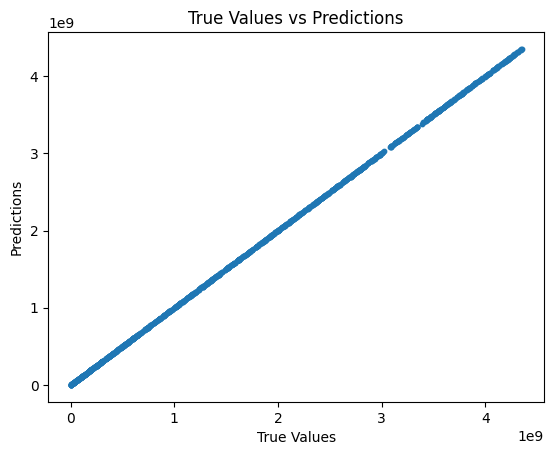

In [16]:
plt.scatter(y_test,y_pred,s=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()